Step 1: import YaFEM modules

In [62]:
from yafem.nodes import *
from yafem.elem import *
from yafem.model import *
from yafem.simulation import *

Step 2: define model parameters

In [63]:
from math import *

_lb1 = 917.0 # length of the short beam [mm]
_lb2 = 1786.0 # length of the long beam [mm]
_lb3 = 603.0 # length of the aluminium beam [mm]

_lc1 = 996.0 # length of the short column [mm]
_lc2 = 1262.0 + 380.0 # length of the long column [mm]

_ls1 = 266.0 # length of the support beam [mm]
_ls2 = 266.0 # length of the support beam [mm]
_hs1 = 321.0 # length of the support beam [mm]
_hs2 = 206.5 # length of the support beam [mm]

_Es = 210e3 # Young's modulus (Steel) [N/mm^2]
_Ea = 70e3 # Young's modulus (~Aluminium) [N/mm^2]

# red - steel
# blue - steel
# green - aluminium

# cross-section parameters (frame)
_b1 = 150.0 # cross section width [mm]
_h1 = 100.0 # cross section height [mm]
_s1 = 5.0 # cross section thickness [mm]
_A1 = _b1*_h1 - (_b1-2*_s1) * (_h1-2*_s1) # cross-section area [mm2]
_Ixx1 = _b1*_h1**3/12 - (_b1-2*_s1)*(_h1-2*_s1)**3/12 # moment of inertia about x-axis [mm4]
_Iyy1 = _h1*_b1**3/12 - (_h1-2*_s1)*(_b1-2*_s1)**3/12 # moment of inertia about y-axis [mm4]

# cross-section parameters (supports)
_b2 = 40.0 # cross section width [mm]
_h2 = 60.0 # cross section height [mm]
_s2 = 5.0 # cross section thickness [mm]
_A2 = _b2*_h2 - (_b2-2*_s2) * (_h2-2*_s2) # cross-section area [mm2]
_Ixx2 = _b2*_h2**3/12 - (_b2-2*_s2)*(_h2-2*_s2)**3/12 # moment of inertia about x-axis [mm4]
_Iyy2 = _h2*_b2**3/12 - (_h2-2*_s2)*(_b2-2*_s2)**3/12 # moment of inertia about y-axis [mm4]

# cross-section parameters (aluminium)
_b3 = 80.0 # cross section width [mm]
_h3 = 5.0 # cross section height [mm]
_A3 = _b3*_h3 # cross-section area [mm2]
_Ixx3 = _b3*_h3**3/12 # moment of inertia about x-axis [mm4]
_Iyy3 = _h3*_b3**3/12 # moment of inertia about y-axis [mm4]

# parameters of the applied boundary conditions (displacements and forces)

_t = 10 # We need to define t; for now it's 10. We're not sure what unit it uses, we're assuming that it's in seconds.
   # The problem is that 10 seconds is very little for displacement - it should be in the hundreds/thousands at least.

_uv = 20.0 
# _uv * sin(4/pi * _t) # vertical displacement applied [mm]
_fh = 100.0 
# fh * sin(2/pi * _t) # horizontal force applied [N]

ts = np.linspace(0, _t, 21)

uvs = []
for t in ts: 

   uvs.append(_uv * sin(4/pi * t))

fhs = []
for t in ts: 

   fhs.append(_fh * sin(2/pi * t))

fhs




[0.0,
 31.296179620778663,
 59.44807685248221,
 81.62731085894214,
 95.60556573276295,
 99.97846620634563,
 94.30667322569474,
 79.16002371658313,
 56.0602798839214,
 27.328239940311878,
 -4.14942916985869,
 -35.210211068184385,
 -62.733473437966595,
 -83.95399348818634,
 -96.73977593093892,
 -99.80625149762888,
 -92.84533577547155,
 -76.55638200764952,
 -52.57591807357896,
 -23.313226874348697,
 8.291710873238415]

Step 3: Create the Finite Element Method nodes

In [64]:
# nodal parameters (x, y, z)
my_nodes_pars = {}
my_nodes_pars['nodal_data'] = np.array([
                                        [1,0.0,0.0,0.0],
                                        [2,_lb1,0.0,0.0],
                                        [3,_lb2,0.0,0.0],
                                        [4,_lb1,0.0, _lc1-_hs1],
                                        [5,_lb1+_ls1,0.0,_lc1-_hs1],
                                        [6,0.0,0.0,_lc1],
                                        [7,_lb1-_hs2,0.0,_lc1],
                                        [8,_lb1,0.0,_lc1],
                                        [9,_lb1-_hs2,0.0,_lc1+_ls2],
                                        [10,_lb2-_lb3,0.0,_lc1+_ls2],
                                        [11,_lb2,0.0,_lc1+_ls2],
                                        [12,0.0,0.0,_lc2],
                                        [13,_lb2,0.0,_lc2]])
# create the nodes
my_nodes = nodes(my_nodes_pars)

Step 4: create the Finite Element Method elements

In [65]:
# parameters of the element 1
my_beam3d_1_pars = {}
my_beam3d_1_pars['shape'] = 'generic'
my_beam3d_1_pars['A'] = _A1
my_beam3d_1_pars['Ixx'] = _Ixx1
my_beam3d_1_pars['Iyy'] = _Iyy1
my_beam3d_1_pars['E'] = _Es
my_beam3d_1_pars['Jv'] = my_beam3d_1_pars['Ixx'] + my_beam3d_1_pars['Iyy']
my_beam3d_1_pars['nodal_labels'] = [1,2]

# parameters of the element 2
my_beam3d_2_pars = {}
my_beam3d_2_pars['shape'] = 'generic'
my_beam3d_2_pars['A'] = _A1
my_beam3d_2_pars['Ixx'] = _Ixx1
my_beam3d_2_pars['Iyy'] = _Iyy1
my_beam3d_2_pars['E'] = _Es
my_beam3d_2_pars['Jv'] = my_beam3d_2_pars['Ixx'] +  my_beam3d_2_pars['Iyy']
my_beam3d_2_pars['nodal_labels'] = [2,3]

# parameters of the element 3
my_beam3d_3_pars = {}
my_beam3d_3_pars['shape'] = 'generic'
my_beam3d_3_pars['A'] = _A1
my_beam3d_3_pars['Ixx'] = _Ixx1
my_beam3d_3_pars['Iyy'] = _Iyy1
my_beam3d_3_pars['E'] = _Es
my_beam3d_3_pars['Jv'] = my_beam3d_3_pars['Ixx'] +  my_beam3d_3_pars['Iyy']
my_beam3d_3_pars['nodal_labels'] = [2,3]

# parameters of the element 4
my_beam3d_4_pars = {}
my_beam3d_4_pars['shape'] = 'generic'
my_beam3d_4_pars['A'] = _A1
my_beam3d_4_pars['Ixx'] = _Ixx1
my_beam3d_4_pars['Iyy'] = _Iyy1
my_beam3d_4_pars['E'] = _Es
my_beam3d_4_pars['Jv'] = my_beam3d_4_pars['Ixx'] +  my_beam3d_4_pars['Iyy']
my_beam3d_4_pars['nodal_labels'] = [1,6]

# parameters of the element 5
my_beam3d_5_pars = {}
my_beam3d_5_pars['shape'] = 'generic'
my_beam3d_5_pars['A'] = _A1
my_beam3d_5_pars['Ixx'] = _Ixx1
my_beam3d_5_pars['Iyy'] = _Iyy1
my_beam3d_5_pars['E'] = _Es
my_beam3d_5_pars['Jv'] = my_beam3d_5_pars['Ixx'] +  my_beam3d_5_pars['Iyy']
my_beam3d_5_pars['nodal_labels'] = [6,12]

# parameters of the element
my_beam3d_6_pars = {}
my_beam3d_6_pars['shape'] = 'generic'
my_beam3d_6_pars['A'] = _A1
my_beam3d_6_pars['Ixx'] = _Ixx1
my_beam3d_6_pars['Iyy'] = _Iyy1
my_beam3d_6_pars['E'] = _Es
my_beam3d_6_pars['Jv'] = my_beam3d_6_pars['Ixx'] +  my_beam3d_6_pars['Iyy']
my_beam3d_6_pars['nodal_labels'] = [2,4]

# parameters of the element 7
my_beam3d_7_pars = {}
my_beam3d_7_pars['shape'] = 'generic'
my_beam3d_7_pars['A'] = _A1
my_beam3d_7_pars['Ixx'] = _Ixx1
my_beam3d_7_pars['Iyy'] = _Iyy1
my_beam3d_7_pars['E'] = _Es
my_beam3d_7_pars['Jv'] = my_beam3d_7_pars['Ixx'] +  my_beam3d_7_pars['Iyy']
my_beam3d_7_pars['nodal_labels'] = [4,8]

# parameters of the element 8
my_beam3d_8_pars = {}
my_beam3d_8_pars['shape'] = 'generic'
my_beam3d_8_pars['A'] = _A1
my_beam3d_8_pars['Ixx'] = _Ixx1
my_beam3d_8_pars['Iyy'] = _Iyy1
my_beam3d_8_pars['E'] = _Es
my_beam3d_8_pars['Jv'] = my_beam3d_8_pars['Ixx'] + my_beam3d_8_pars['Iyy']
my_beam3d_8_pars['nodal_labels'] = [3,11]

# parameters of the element 9
my_beam3d_9_pars = {}
my_beam3d_9_pars['shape'] = 'generic'
my_beam3d_9_pars['A'] = _A1
my_beam3d_9_pars['Ixx'] = _Ixx1
my_beam3d_9_pars['Iyy'] = _Iyy1
my_beam3d_9_pars['E'] = _Es
my_beam3d_9_pars['Jv'] = my_beam3d_9_pars['Ixx'] +  my_beam3d_9_pars['Iyy']
my_beam3d_9_pars['nodal_labels'] = [11,13]

# parameters of the element 10
my_beam3d_10_pars = {}
my_beam3d_10_pars['shape'] = 'generic'
my_beam3d_10_pars['A'] = _A1
my_beam3d_10_pars['Ixx'] = _Ixx1
my_beam3d_10_pars['Iyy'] = _Iyy1
my_beam3d_10_pars['E'] = _Es
my_beam3d_10_pars['Jv'] = my_beam3d_10_pars['Ixx'] +  my_beam3d_10_pars['Iyy']
my_beam3d_10_pars['nodal_labels'] = [6,7]

# parameters of the element 11
my_beam3d_11_pars = {}
my_beam3d_11_pars['shape'] = 'generic'
my_beam3d_11_pars['A'] = _A1
my_beam3d_11_pars['Ixx'] = _Ixx1
my_beam3d_11_pars['Iyy'] = _Iyy1
my_beam3d_11_pars['E'] = _Es
my_beam3d_11_pars['Jv'] = my_beam3d_11_pars['Ixx'] + my_beam3d_11_pars['Iyy']
my_beam3d_11_pars['nodal_labels'] = [7,8]

# parameters of the element 12
my_beam3d_12_pars = {}
my_beam3d_12_pars['shape'] = 'generic'
my_beam3d_12_pars['A'] = _A1
my_beam3d_12_pars['Ixx'] = _Ixx1
my_beam3d_12_pars['Iyy'] = _Iyy1
my_beam3d_12_pars['E'] = _Es
my_beam3d_12_pars['Jv'] = my_beam3d_12_pars['Ixx'] + my_beam3d_12_pars['Iyy']
my_beam3d_12_pars['nodal_labels'] = [12,13]

# parameters of the element 13
my_beam3d_13_pars = {}
my_beam3d_13_pars['shape'] = 'generic'
my_beam3d_13_pars['A'] = _A2
my_beam3d_13_pars['Ixx'] = _Ixx2
my_beam3d_13_pars['Iyy'] = _Iyy2
my_beam3d_13_pars['E'] = _Es
my_beam3d_13_pars['Jv'] = my_beam3d_13_pars['Ixx'] + my_beam3d_13_pars['Iyy']
my_beam3d_13_pars['nodal_labels'] = [7,9]

# parameters of the element 14
my_beam3d_14_pars = {}
my_beam3d_14_pars['shape'] = 'generic'
my_beam3d_14_pars['A'] = _A2
my_beam3d_14_pars['Ixx'] = _Ixx2
my_beam3d_14_pars['Iyy'] = _Iyy2
my_beam3d_14_pars['E'] = _Es
my_beam3d_14_pars['Jv'] = my_beam3d_14_pars['Ixx'] + my_beam3d_14_pars['Iyy']
my_beam3d_14_pars['nodal_labels'] = [9,8]

# parameters of the element 15
my_beam3d_15_pars = {}
my_beam3d_15_pars['shape'] = 'generic'
my_beam3d_15_pars['A'] = _A2
my_beam3d_15_pars['Ixx'] = _Ixx2
my_beam3d_15_pars['Iyy'] = _Iyy2
my_beam3d_15_pars['E'] = _Es
my_beam3d_15_pars['Jv'] = my_beam3d_15_pars['Ixx'] + my_beam3d_15_pars['Iyy']
my_beam3d_15_pars['nodal_labels'] = [4,5]

# parameters of the element 16
my_beam3d_16_pars = {}
my_beam3d_16_pars['shape'] = 'generic'
my_beam3d_16_pars['A'] = _A2
my_beam3d_16_pars['Ixx'] = _Ixx2
my_beam3d_16_pars['Iyy'] = _Iyy2
my_beam3d_16_pars['E'] = _Es
my_beam3d_16_pars['Jv'] = my_beam3d_16_pars['Ixx'] + my_beam3d_16_pars['Iyy']
my_beam3d_16_pars['nodal_labels'] = [5,8]

# parameters of the element 17 - this is the beam - we need to plot the force and displacement on this one
my_beam3d_17_pars = {}
my_beam3d_17_pars['shape'] = 'generic'
my_beam3d_17_pars['A'] = _A3
my_beam3d_17_pars['Ixx'] = _Ixx3
my_beam3d_17_pars['Iyy'] = _Iyy3
my_beam3d_17_pars['E'] = _Ea
my_beam3d_17_pars['Jv'] = my_beam3d_17_pars['Ixx'] + my_beam3d_17_pars['Iyy']
my_beam3d_17_pars['nodal_labels'] = [10,11]

# initialization of the element list
my_elements = []

# add one beam3d element to the list
my_elements.append(beam3d(my_nodes,my_beam3d_1_pars))
my_elements.append(beam3d(my_nodes,my_beam3d_2_pars))
my_elements.append(beam3d(my_nodes,my_beam3d_3_pars))
my_elements.append(beam3d(my_nodes,my_beam3d_4_pars))
my_elements.append(beam3d(my_nodes,my_beam3d_5_pars))
my_elements.append(beam3d(my_nodes,my_beam3d_6_pars))
my_elements.append(beam3d(my_nodes,my_beam3d_7_pars))
my_elements.append(beam3d(my_nodes,my_beam3d_8_pars))
my_elements.append(beam3d(my_nodes,my_beam3d_9_pars))
my_elements.append(beam3d(my_nodes,my_beam3d_10_pars))
my_elements.append(beam3d(my_nodes,my_beam3d_11_pars))
my_elements.append(beam3d(my_nodes,my_beam3d_12_pars))
my_elements.append(beam3d(my_nodes,my_beam3d_13_pars))
my_elements.append(beam3d(my_nodes,my_beam3d_14_pars))
my_elements.append(beam3d(my_nodes,my_beam3d_15_pars))
my_elements.append(beam3d(my_nodes,my_beam3d_16_pars))
my_elements.append(beam3d(my_nodes,my_beam3d_17_pars))

Step 5: Create the Finite Element Method model

In [66]:
# Model parameters
my_model_pars = {}

# x - 1 (right)
# y - 2 (inside)
# z - 3 (up)
# rotation around x axis - >4

# Constrained degrees of freedom
my_model_pars['dofs_c'] = np.array([[1, 1], [1, 2], [1, 3], [1, 4],
                                    [3, 2], [3, 3], [3, 4]])

# Degrees of freedom subjected to force history 
my_model_pars['dofs_f'] = np.array([[9, 1], [10, 1]])

# Degrees of freedom subjected to displacement history (vertical dofs of node 2)
my_model_pars['dofs_u'] = np.array([[5, 3], [10, 3]])

# Force history (21 steps) - Ensure g_f is a 2D array with dimensions (2, 21)
my_model_pars['g_f'] = np.array([np.multiply(fhs,-1), np.multiply(fhs,1)])

# Displacement history (21 steps) - Ensure  is a 2D array with dimensions (2, 21)
my_model_pars['g_u'] = np.array([np.multiply(uvs,-0.1), np.multiply(uvs,0.9)])

# Create the model
my_model = model(my_nodes, my_elements, my_model_pars)

# list of model dofs (left column is node number, right column is the dof number)
[np.multiply(fhs,-1), np.multiply(fhs,1)]

[array([ -0.        , -31.29617962, -59.44807685, -81.62731086,
        -95.60556573, -99.97846621, -94.30667323, -79.16002372,
        -56.06027988, -27.32823994,   4.14942917,  35.21021107,
         62.73347344,  83.95399349,  96.73977593,  99.8062515 ,
         92.84533578,  76.55638201,  52.57591807,  23.31322687,
         -8.29171087]),
 array([  0.        ,  31.29617962,  59.44807685,  81.62731086,
         95.60556573,  99.97846621,  94.30667323,  79.16002372,
         56.06027988,  27.32823994,  -4.14942917, -35.21021107,
        -62.73347344, -83.95399349, -96.73977593, -99.8062515 ,
        -92.84533578, -76.55638201, -52.57591807, -23.31322687,
          8.29171087])]

Step 6: create and execute the simulation

In [67]:
# simulation parameters
simulation_pars = {}

# create the simulation
my_simulation = simulation(my_model,simulation_pars)

# perform static analysis (u: displacements, l: applied forces, r: restoring force)
[u,l,r] = my_simulation.static_analysis()
# [u, v, a, r] = my_simulation.dynamic_analysis()

u

step 1 converged in 1 iterations with residual 1.4132932932830257e-10
step 2 converged in 1 iterations with residual 3.6369166091714584e-11
step 3 converged in 1 iterations with residual 1.2398318576779184e-12
step 4 converged in 1 iterations with residual 5.924880304441071e-11
step 5 converged in 1 iterations with residual 2.9842505892001505e-09
step 6 converged in 1 iterations with residual 3.216212370392637e-10
step 7 converged in 1 iterations with residual 5.975027865376446e-11
step 8 converged in 1 iterations with residual 1.3553688226580542e-11
step 9 converged in 1 iterations with residual 1.3724743946179143e-10
step 10 converged in 1 iterations with residual 2.0905674627851175e-09
step 11 converged in 1 iterations with residual 1.0066472636954862e-10
step 12 converged in 1 iterations with residual 6.801910823204349e-11
step 13 converged in 1 iterations with residual 8.065250345852588e-12
step 14 converged in 1 iterations with residual 8.809988176973145e-11
step 15 converged in 

array([[ 0.        ,  0.00112156,  0.00180356, ..., -0.00168741,
        -0.00085544,  0.0003118 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.00104006,  0.00167763, ..., -0.00156788,
        -0.00079296,  0.00028891],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.00059069,  0.00094941, ..., -0.00088842,
        -0.00045056,  0.00016424],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]], shape=(71, 21))

Step 7: Post-process the results

First, let's plot all the elements of our model

<Axes3D: xlabel='x', ylabel='y', zlabel='z'>

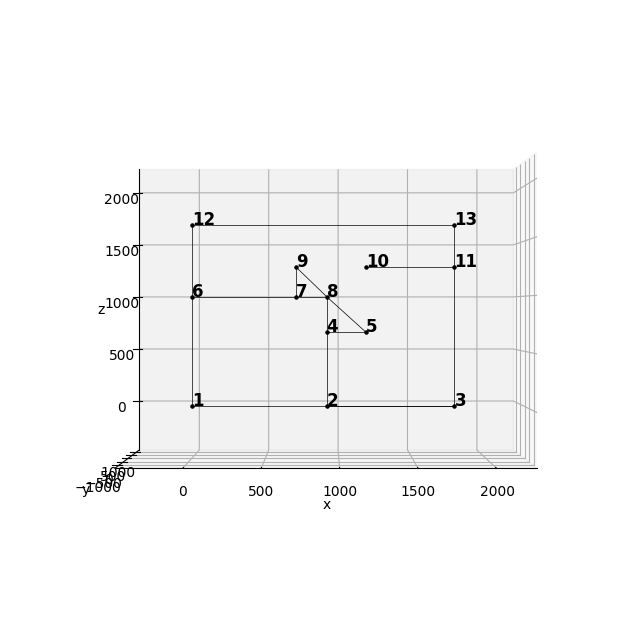

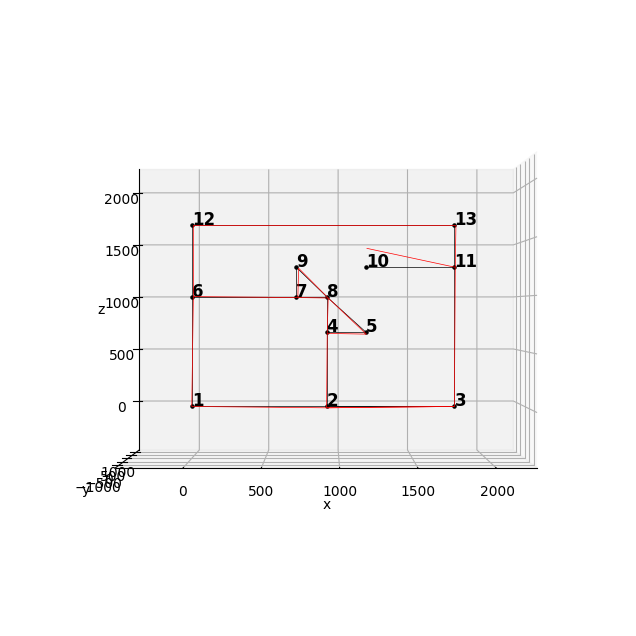

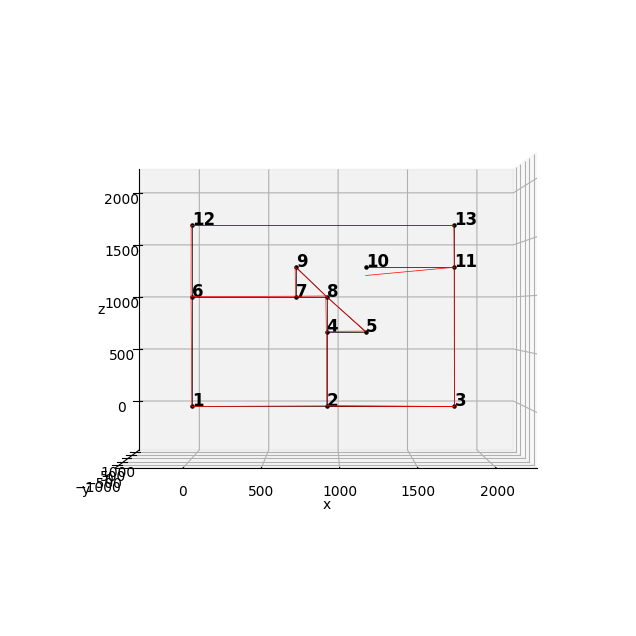

In [68]:
my_model.plot(labels = True, rotate = (0,-90), zoom = 1.8)

my_model.plot(labels = True, rotate = (0,-90), response = u[:,2], scale = 10, zoom = 1.8)
my_model.plot(labels = True, rotate = (0,-90), response = u[:,5], scale = 100, zoom = 1.8)

#omega, phi = my_model.compute_modal(1) 
#my_model.plot(labels = True, rotate = (0,-90), response = phi[:,0], scale = 100, zoom = 1.8)


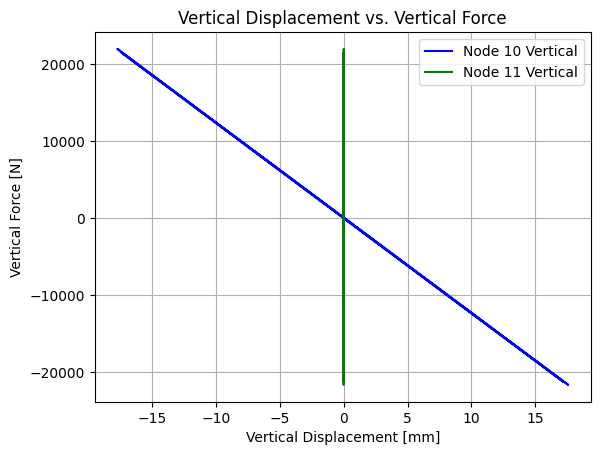

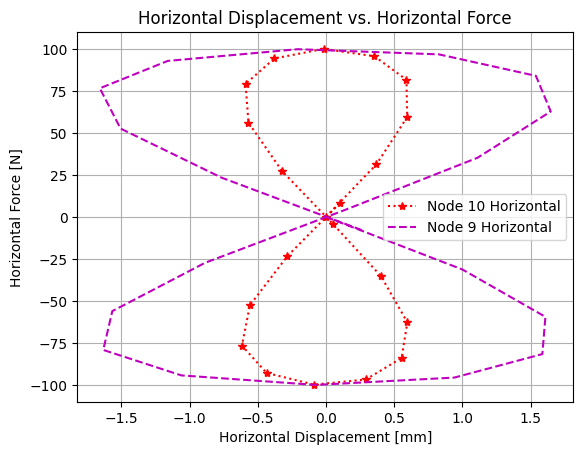

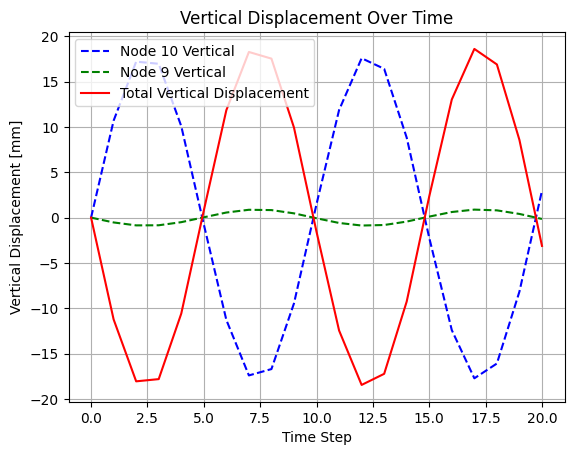

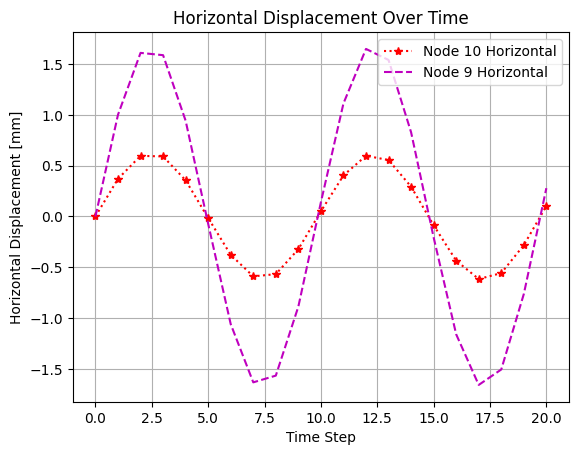

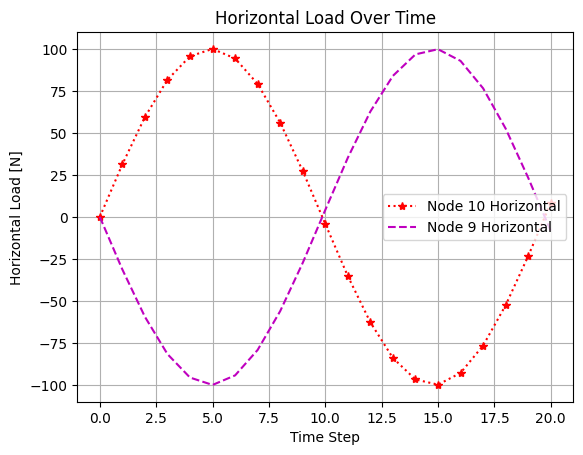

In [69]:
import matplotlib.pyplot as plt

# Assuming node 10 has DOF 1 for horizontal displacement and DOF 2 for vertical displacement
node1_index = 10
node2_index = 11
node3_index = 9

# Find the DOF indices for nodes 9, 10 and 11
dof1_horizontal = my_model.find_dofs([[node1_index, 1]]).squeeze()
dof1_vertical = my_model.find_dofs([[node1_index, 3]]).squeeze()
dof2_horizontal = my_model.find_dofs([[node2_index, 1]]).squeeze()
dof2_vertical = my_model.find_dofs([[node2_index, 3]]).squeeze()
dof3_horizontal = my_model.find_dofs([[node3_index, 1]]).squeeze()
dof3_vertical = my_model.find_dofs([[node3_index, 3]]).squeeze()

# Plot Vertical Displacement vs. Vertical Force for node 10 and 11
plt.figure()
plt.plot(u[dof1_vertical, :], l[0, :], 'b-', label='Node '+str(node1_index)+' Vertical')
plt.plot(u[dof2_vertical, :], l[0, :], 'g-', label='Node '+str(node2_index)+' Vertical')
plt.xlabel('Vertical Displacement [mm]')
plt.ylabel('Vertical Force [N]')
plt.title('Vertical Displacement vs. Vertical Force')
plt.legend()
plt.grid()
plt.show()

# Plot Horizontal Displacement vs. Horizontal Force for node 9 and 10
plt.figure()
plt.plot(u[dof1_horizontal, :], np.multiply(fhs,1), 'r:*', label='Node '+str(node1_index)+' Horizontal')
plt.plot(u[dof3_horizontal, :], np.multiply(fhs,-1), 'm--', label='Node '+str(node3_index)+' Horizontal')
plt.xlabel('Horizontal Displacement [mm]')
plt.ylabel('Horizontal Force [N]')
plt.title('Horizontal Displacement vs. Horizontal Force')
plt.legend()
plt.grid()
plt.show()

# Plot Vertical Displacement Over Time for nodes 9 and 10
plt.figure()
plt.plot(u[dof1_vertical, :], 'b--', label='Node '+str(node1_index)+' Vertical')
plt.plot(u[dof3_vertical, :], 'g--', label='Node '+str(node3_index)+' Vertical')
plt.plot(np.subtract(u[dof3_vertical, :],u[dof1_vertical, :]), 'r-', label='Total Vertical Displacement')
plt.xlabel('Time Step')
plt.ylabel('Vertical Displacement [mm]')
plt.title('Vertical Displacement Over Time')
plt.legend()
plt.grid()
plt.show()

# Plot Horizontal Displacement Over Time for nodes 9 and 10
plt.figure()
plt.plot(u[dof1_horizontal, :], 'r:*', label='Node '+str(node1_index)+' Horizontal')
plt.plot(u[dof3_horizontal, :], 'm--', label='Node '+str(node3_index)+' Horizontal')
plt.xlabel('Time Step')
plt.ylabel('Horizontal Displacement [mm]')
plt.title('Horizontal Displacement Over Time')
plt.legend()
plt.grid()
plt.show()

# Plot Horizontal Load Over Time for nodes 9 and 10
plt.figure()
plt.plot(fhs, 'r:*', label='Node '+str(node1_index)+' Horizontal')
plt.plot(np.multiply(fhs,-1), 'm--', label='Node '+str(node3_index)+' Horizontal')
plt.xlabel('Time Step')
plt.ylabel('Horizontal Load [N]')
plt.title('Horizontal Load Over Time')
plt.legend()
plt.grid()
plt.show()

